In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [13]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('./u.user', sep='|', names=u_cols, encoding='latin-1')
# users = users.set_index('user_id')
# users.head()

# u.itm 파일을 DataFrame으로 읽기
i_cols = ['movie_id', 'title', 'release date', 'video release date', 'IMDB URL', 
    'unknown', 'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 'Crime', 
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 
    'Romance', 'Sci-fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('./u.item', sep='|', names=i_cols, encoding='latin-1')
# movies = movies.set_index('movie_id')
# movies.head()

# u.data
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('./u.data', sep='\t', names=r_cols, encoding='latin-1')
# ratings = ratings.set_index('user_id')
# ratings.head()

# remove timestamp
ratings = ratings.drop('timestamp', axis=1)
# ratings.head()

# remove all except movie id and title
movies = movies[['movie_id', 'title']]
# movies.head()

In [14]:
X = ratings.copy() # deep copy
y = ratings['user_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [15]:
def RMSE(y_true, y_pred): # root mean square error
    return np.sqrt(np.mean((np.array(y_true) - np.array(y_pred))**2))

def score(model):
    id_pairs = zip(X_test['user_id'], X_test['movie_id'])
    y_pred = np.array([model(user, movie) for (user, movie) in id_pairs])
    y_true = np.array(X_test['rating'])
    return RMSE(y_true, y_pred)

rating_matrix = X_train.pivot(index='user_id', columns='movie_id', values='rating')
print(rating_matrix)

movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          5.0   3.0   NaN   3.0   3.0   5.0   NaN   NaN   5.0   NaN  ...   
2          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   2.0  ...   
3          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5          4.0   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...        ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
939        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   5.0   NaN  ...   
940        NaN   NaN   NaN   NaN   NaN   NaN   4.0   5.0   NaN   NaN  ...   
941        5.0   NaN   NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN  ...   
942        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
943        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

In [16]:
rating_matrix_t = np.transpose(rating_matrix)

In [17]:
rating_matrix_t.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,...,2.0,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: xlabel='user_id', ylabel='movie_id'>

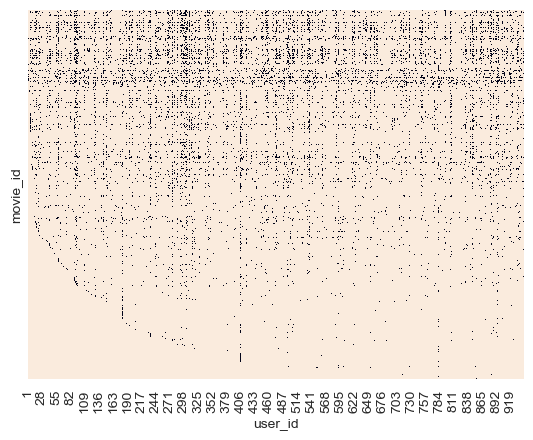

In [18]:
sns.heatmap(rating_matrix_t.isnull(), yticklabels=False, cbar=False)

In [19]:
# train set의 모든 가능한 사용자 pair의 cosine similarities를 계산
matrix_dummy = rating_matrix_t.copy().fillna(0)

In [20]:
matrix_dummy.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,...,2.0,0.0,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
2,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: xlabel='user_id', ylabel='movie_id'>

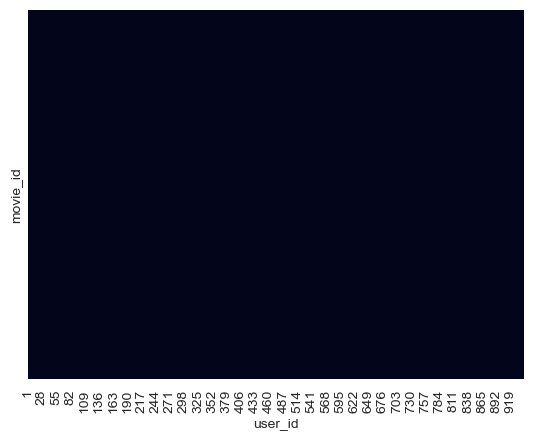

In [21]:
sns.heatmap(matrix_dummy.isnull(), yticklabels=False, cbar=False)

In [22]:
item_similarity = cosine_similarity(matrix_dummy, matrix_dummy)

In [23]:
item_similarity[0]

array([1.        , 0.34319672, 0.21774671, ..., 0.        , 0.        ,
       0.05430754])

In [24]:
# user가 movie에 대한 선호도를 나타낸다
# 사람은 943명이고 영호는 1600개이다
# 한사람의 전체 영화에 대한 선호도는 1600개이며, 이에 대한 코사인 유사도는 943 * 943개이다

len(item_similarity[0])

1636

In [25]:
item_similarity = pd.DataFrame(item_similarity, index=rating_matrix_t.index, columns=rating_matrix_t.index)

In [26]:
item_similarity.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,1671,1672,1673,1675,1676,1677,1678,1679,1680,1681
movie_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.343197,0.217747,0.353973,0.217120,0.086579,0.467188,0.360684,0.377947,0.195785,...,0.0,0.0,0.040731,0.000000,0.000000,0.040731,0.0,0.0,0.0,0.054308
2,0.343197,1.000000,0.227319,0.394268,0.267368,0.062165,0.315652,0.261239,0.192768,0.115288,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.086966
3,0.217747,0.227319,1.000000,0.230870,0.140689,0.022238,0.256987,0.180517,0.231958,0.114845,...,0.0,0.0,0.000000,0.000000,0.000000,0.039406,0.0,0.0,0.0,0.000000
4,0.353973,0.394268,0.230870,1.000000,0.143186,0.081477,0.380861,0.417202,0.333659,0.198830,...,0.0,0.0,0.000000,0.104622,0.104622,0.041849,0.0,0.0,0.0,0.000000
5,0.217120,0.267368,0.140689,0.143186,1.000000,0.031482,0.238725,0.149422,0.191160,0.032743,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


In [27]:
# 주어진 영화의 (movie_id) 가중평균 rating을 계산하는 함수, 
# 가중치는 주어진 사용자와 다른 사용자 간의 유사도(user_similarity)
def CF_IBCF(user_id, movie_id):
    if movie_id in item_similarity:
        sim_scores = item_similarity[movie_id].copy()
        user_rating = rating_matrix_t[user_id].copy()
        none_rating_idx = user_rating[user_rating.isnull()].index
        user_rating = user_rating.dropna()
        sim_scores = sim_scores.drop(none_rating_idx)
        mean_rating = np.dot(sim_scores, user_rating) / sim_scores.sum()
    else:
        mean_rating = 3.0
    return mean_rating

In [28]:
# 정확도 계산
score(CF_IBCF)

1.0161054065499895

In [29]:
def recommender(user, n_items=10):
    predictions = []
    rated_index = rating_matrix.loc[user][rating_matrix.loc[user] > 0].index # 현재 사용자가 이미 본 영화들의 인덱스
    items = rating_matrix.loc[user].drop(rated_index)
    for item in items.index:
        predictions.append(CF_IBCF(user, item))
    # print(predictions)
    recommendations = pd.Series(data=predictions, index=items.index, dtype=float)
    recommendations = recommendations.sort_values(ascending=False).iloc[:n_items]
    print(recommendations)
    recommended_items = movies.loc[recommendations.index]['title']
    return recommended_items

In [30]:
recommender(user=2, n_items=5)

movie_id
1027    5.000000
1122    4.740047
1556    4.692361
1619    4.675904
1450    4.622754
dtype: float64


movie_id
1027              Grumpier Old Men (1995)
1122    Last Time I Saw Paris, The (1954)
1556                   Yankee Zulu (1994)
1619                Sixth Man, The (1997)
1450         Foreign Correspondent (1940)
Name: title, dtype: object